In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns
sns.set(font_scale=1.5)

## Несмещенность оценок

**1.** Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим оценки $X_{(n)}, \frac{n+1}{n}X_{(n)}, 2\overline{X}$ параметра $\theta$.

**Вопрос:** Какие из этих оценок являются несмещенными?

**Ответ:** $\frac{n+1}{n}X_{(n)}, 2\overline{X}$

Реализуем выборку из равномерного распределения размером `sample_size`=100. 

In [34]:
sample_size = 100
X = sps.uniform.rvs(size=sample_size)

В этом случае мы сгенерировали выборку из распределения $U[0, 1]$. 


Реализуйте три функции, каждая из которых на вход берет несколько выборок, а на выход выдает массив оценок  
(первая функция - $X_{(n)}$, вторая функция - $\frac{n+1}{n}X_{(n)}$, третья функция - $2\overline{X}$)  для каждой выборки.

In [54]:
def estimate_X_n(X):
  count = X.shape[0]
  arr = []
  for i in range(count):
    arr.append(np.max(X[i]))
  return np.array(arr)

def estimate_X_n_corrected(X):
  count = X.shape[0]
  size = X.shape[1]
  arr = []
  for i in range(count):
    val = np.max(X[i])
    arr.append(val * (size + 1) / (size))
  return np.array(arr)

def estimate_2_mean(X):
  count = X.shape[0]
  arr = []
  for i in range(count):
    arr.append(2 * np.mean(X[i]))
  return  np.array(arr)
    

Проверим, что ваши функции реализованы корректно (ячейка не должна выдавать ошибок).

In [55]:
X = np.array([[1, 3, 3902, 6], [2, 5, 69751, 89]])


assert(sum(estimate_X_n(X) != np.array(( 3902, 69751))) == 0)
assert(sum(estimate_X_n_corrected(X) != np.array((4877.5 ,87188.75))) == 0)
assert(sum(estimate_2_mean(X) != np.array([ 1956. , 34923.5])) == 0)


Зададим список оценок и разные параметры для отрисовки графика

In [69]:
estimators = [
    (estimate_X_n, r'$X_{(n)}$', 'blue', 0.0),
    (estimate_X_n_corrected, r'$\frac{n+1}{n}X_{(n)}$', 'purple', 0.1),
    (estimate_2_mean, r'$2\overline{X}$', 'green', 0.2)
]


Мы хотим понять, являются ли оценки параметра $\theta$ смещенными, для этого нам нужно провести множество экспериментов (сгенерировать выборку много раз, так как при каждой генерации получаются разные числа).

 Создадим 500 выборок размера `sample_size`.

In [57]:
sample_count = 500
sample_size = 100
X = sps.uniform.rvs(size = (sample_count, sample_size))
X.shape

(500, 100)

Визуализируем полученные оценки на одном графике. Звездочками обозначим средние значения по 500 экспериментам для каждой оценки.

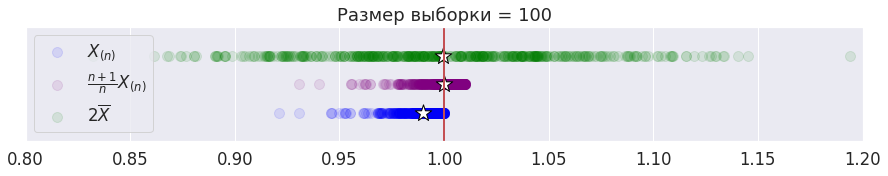

In [58]:
plt.figure(figsize=(15, 0.7*len(estimators)))
for estimator, name, color, y in estimators:
    E = estimator(X)
    plt.scatter(E, np.zeros(sample_count) + y, alpha=0.1,
                    s=100, color=color, label=name)
    plt.scatter(E.mean(), y, marker='*', s=300,
                    color='w', edgecolors='black')

    plt.vlines(1, -1, 1, color='r')
    plt.title('Размер выборки = %d' % sample_size)
    plt.yticks([])
    plt.legend()
    plt.xlim((0.8, 1.2))
    plt.ylim((-0.1, 0.1 * len(estimators)))

Напишите функцию построения таких графиков в общем виде: на вход функция может получать любые распределения (`distributions`) и любые оценки (`estimators`).

In [60]:

def plot_estimators(distribution, estimators, sample_count, sample_size):
  plt.figure(figsize=(15,8))

  arr = np.array([])
  for i in range(sample_count): 
    sample = distribution.rvs(size=sample_size)
    arr.append(sample)

  for estimator, name, color, y in estimators:
    E = estimator(X)
    plt.scatter(E, np.zeros(sample_count) + y, alpha=0.1,
                    s=100, color=color, label=name)
    plt.scatter(E.mean(), y, marker='*', s=300,
                    color='w', edgecolors='black')

    plt.vlines(1, -1, 1, color='r')
    plt.title('Размер выборки = %d' % sample_size)
    plt.yticks([])
    plt.legend()
    plt.ylim((-0.1, 0.2 * len(estimators)));

Постройте три графика, аналогичных верхнему, для разных размеров выборок (10, 100, 500).


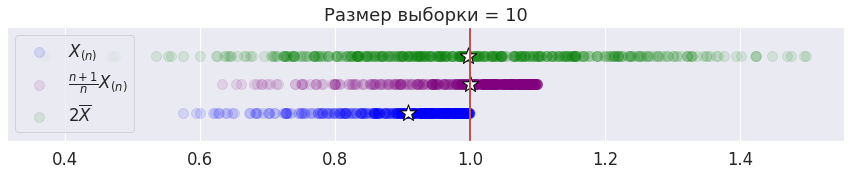

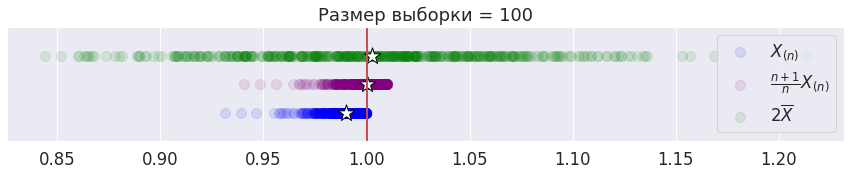

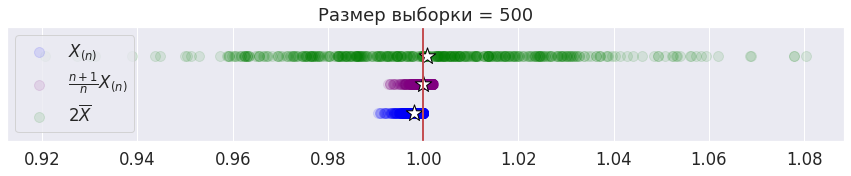

In [63]:
sample_size_list = (10, 100, 500)  # размеры выборок
sample_count = 500  # количество экспериментов

for sample_size in sample_size_list:
    X = sps.uniform.rvs(size = (sample_count, sample_size))
    plt.figure(figsize=(15, 0.7*len(estimators)))
    for estimator, name, color, y in estimators:
        E = estimator(X)
        plt.scatter(E, np.zeros(sample_count) + y, alpha=0.1,
                        s=100, color=color, label=name)
        plt.scatter(E.mean(), y, marker='*', s=300,
                        color='w', edgecolors='black')

        plt.vlines(1, -1, 1, color='r')
        plt.title('Размер выборки = %d' % sample_size)
        plt.yticks([])
        plt.legend()
        plt.ylim((-0.1, 0.1 * len(estimators)))

**2.** Изучим поведение среднего оценок из первого пункта при росте размера $n$ выборки. Для вычисления зависимости нужно один раз сгенерировать выборки из п. 1.1 достаточно большого размера и посчитать оценки по префиксам, используя функции из `numpy`. Какие из оценок являются асимптотически несмещёнными (т.е. $\forall \theta \in \Theta\colon \mathsf{E}_\theta \widehat{\theta} \to \theta$ при $n\to +\infty$)?

Асимтотически несмещенными являются $\frac{n}{n-1}X_{(n)}$ и $2\overline{X}$, с увеличением n смещение $X_{(n)}$уменьшается

In [81]:
def mean_plot(distribution, estimators, n_grid, sample_count):
    """
    Функция для построения графика зависимости средних оценок от размера выборки.
    
    distribution - распределение из scipy.stats
    estimators - список кортежей вида (оценка, название, цвет)
    n_grid - массив значений размера выборки
    sample_count - количество генерируемых выборок
    
    """
    plt.figure(figsize=(15, 8))
    
    for estimator, name, color, alpha in estimators:
        mean_estimates = []
        for n in n_grid:
            X = distribution.rvs(size=(sample_count, int(n)))
            estimates = estimator(X)
            mean_estimate = np.mean(estimates)
            mean_estimates.append(mean_estimate)

        plt.plot(n_grid, mean_estimates, label=name, color=color)

    plt.xlabel('Размер выборки')
    plt.ylabel('Оценка')
    plt.title('Зависимость оценок от размера выборки')
    plt.legend();


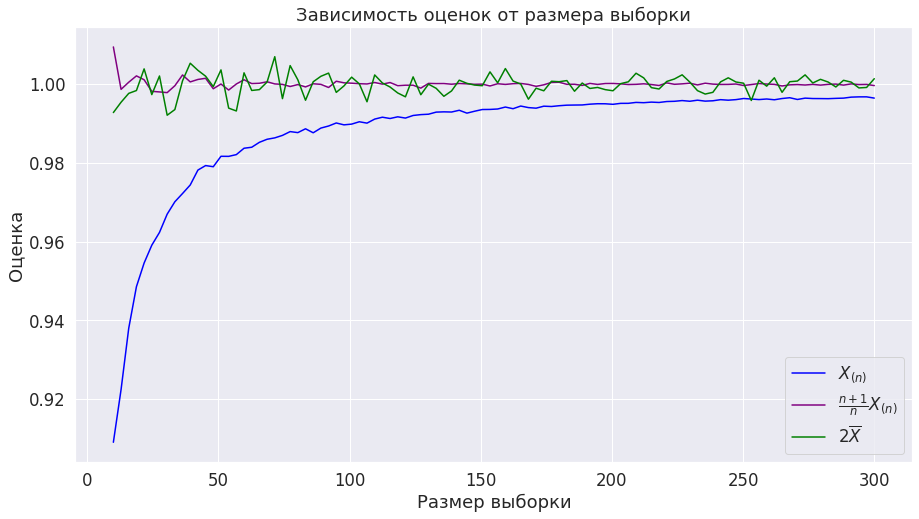

In [82]:
n_grid = np.linspace(10, 300, 100)
mean_plot(sps.uniform, estimators, n_grid, sample_count)

**Вывод.** Несмещенность &mdash; свойство оценки в среднем быть равной параметру, который она оценивает. Иначе говоря, при бесконечном повторении эксперимента в среднем оценка будет равна истинному значению параметра.
Проведенные эксперименты подтверждают свойство несмещенности &mdash; среднее значение несмещенных оценок $\frac{n}{n-1}X_{(n)}$ и $2\overline{X}$ оказались примерно равны истинному значению параметра в отличии от смещенной оценки $X_{(n)}$. Кроме того, можно заметить, что для смещенной оценки $X_{(n)}$ смещение уменьшается с ростом размера выборки, иначе говоря, она является *асимптотически несмещенной*.

В лабораторных работах скорректированные оценки используют, т.к. число опытов часто мало и $n$ нельзя считать достаточно большим. В таком случае отличие между несмещенными оценками и асимптотически несмещенными оценками становится существенным.

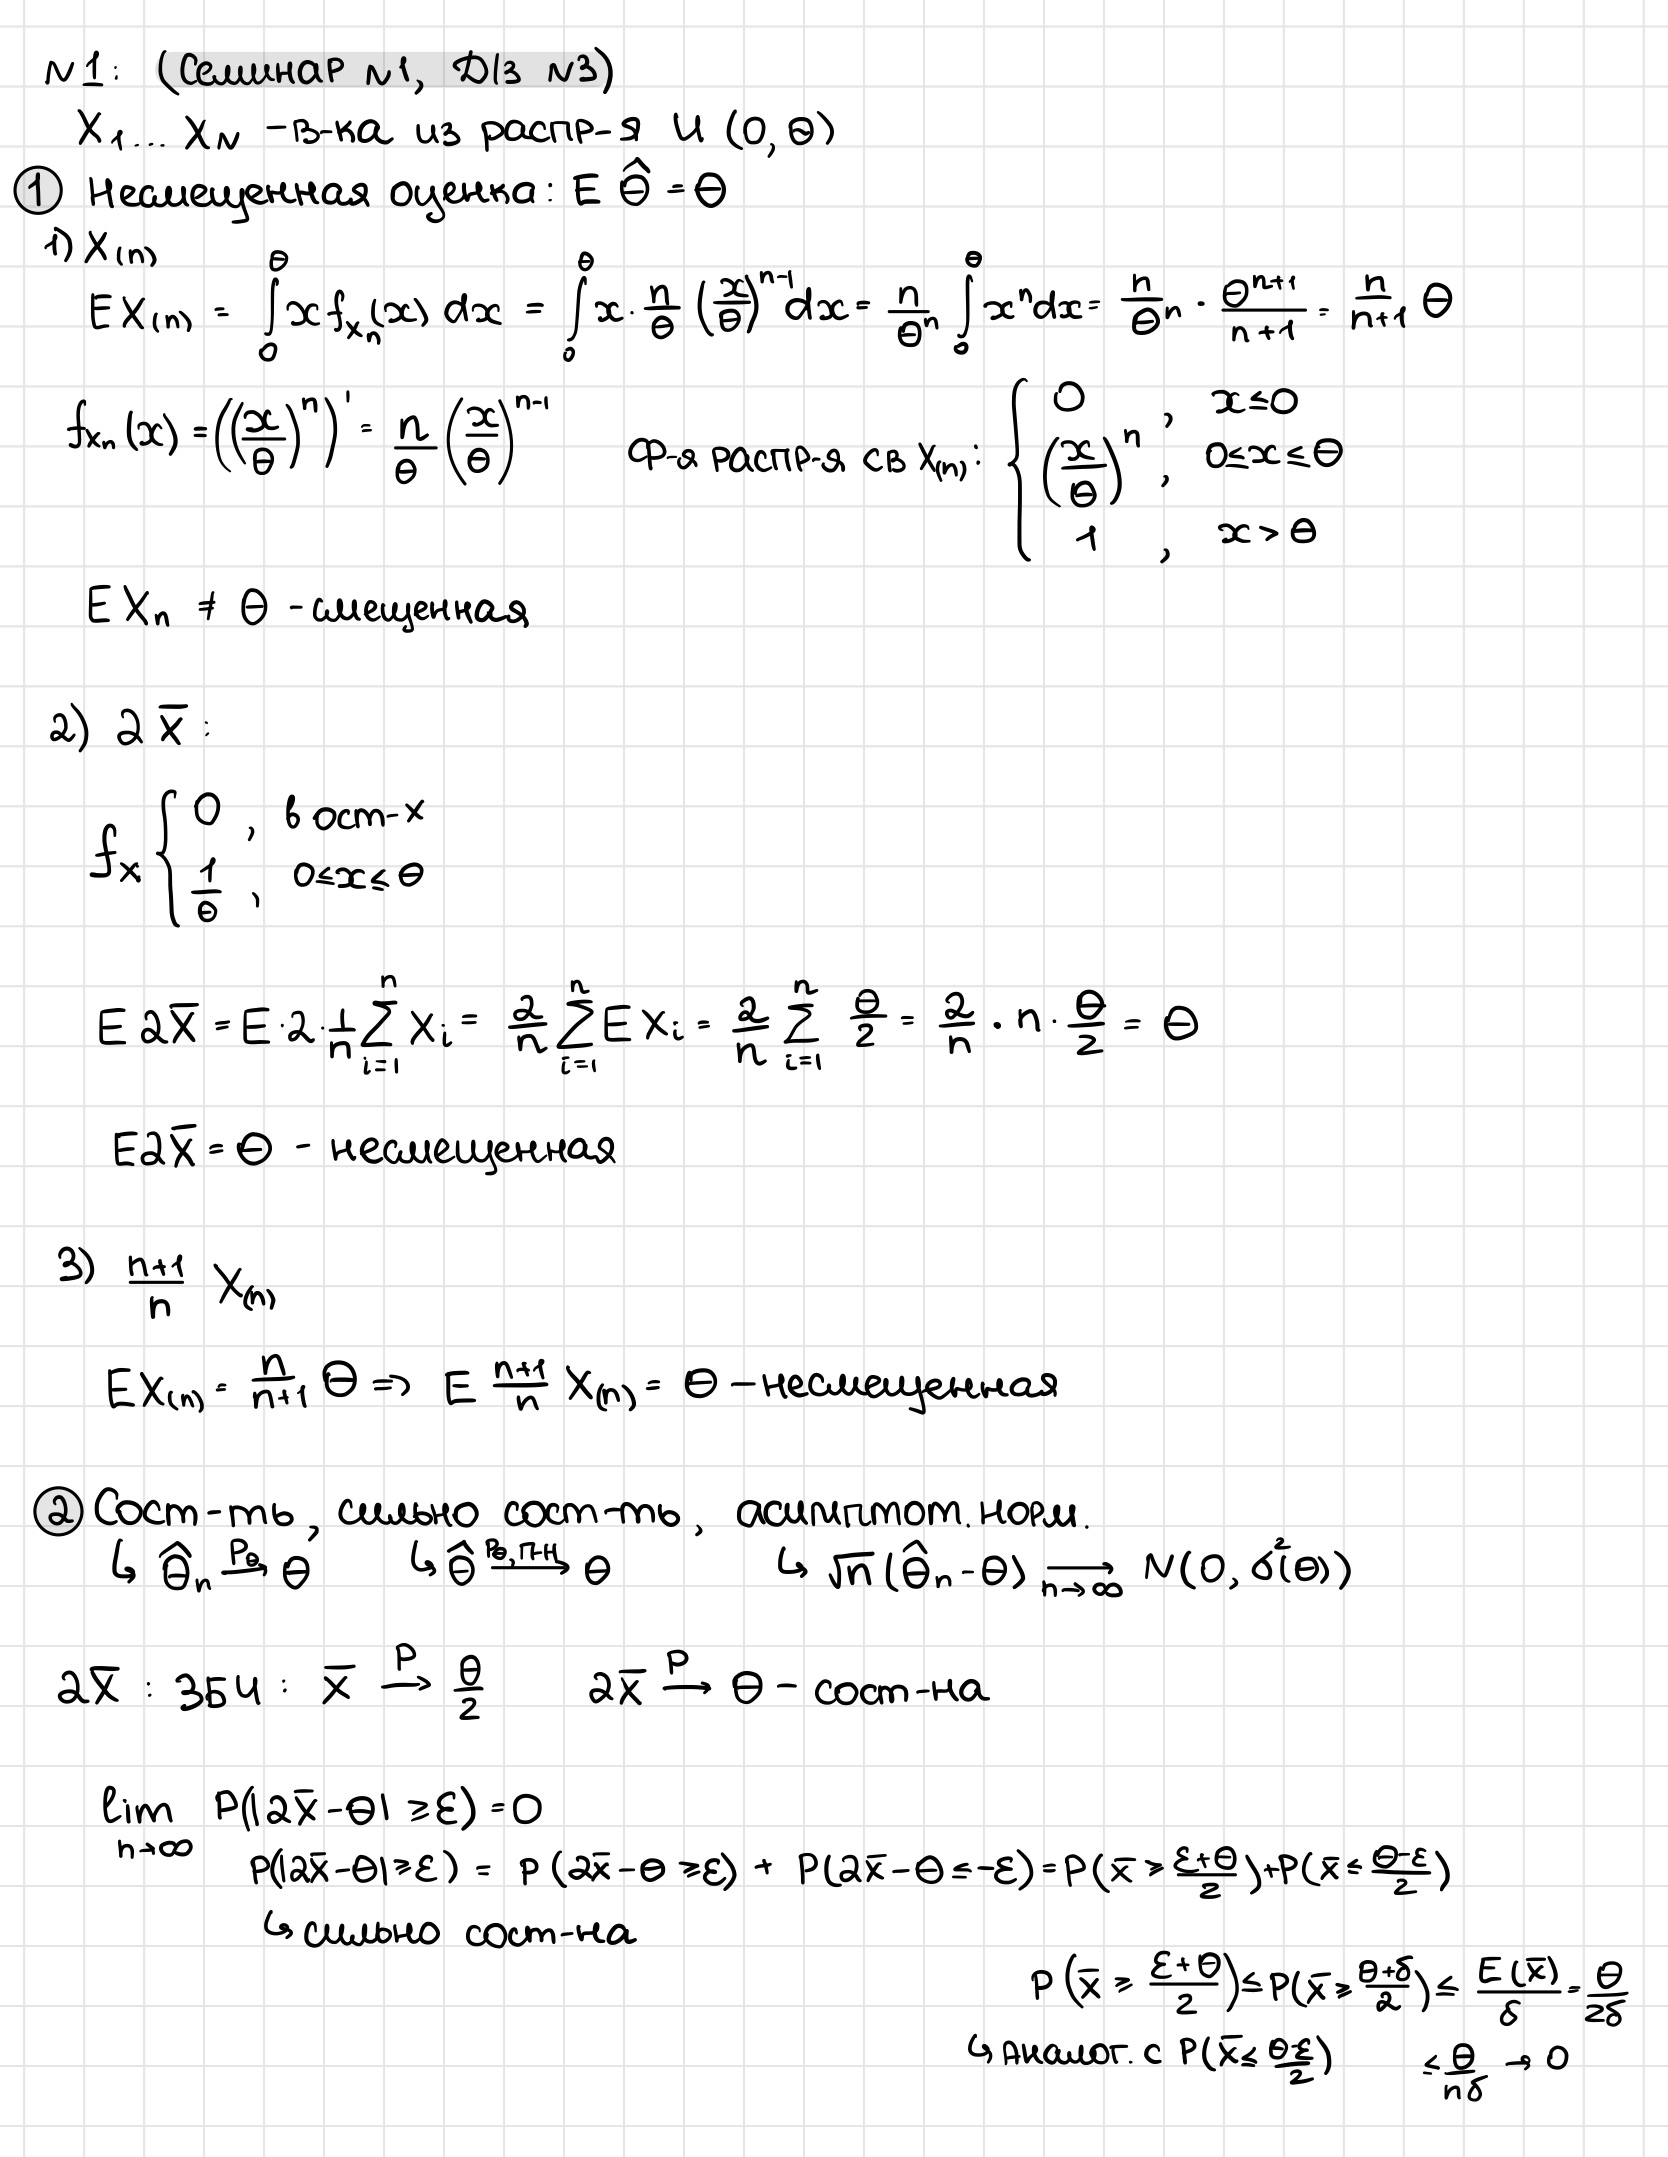

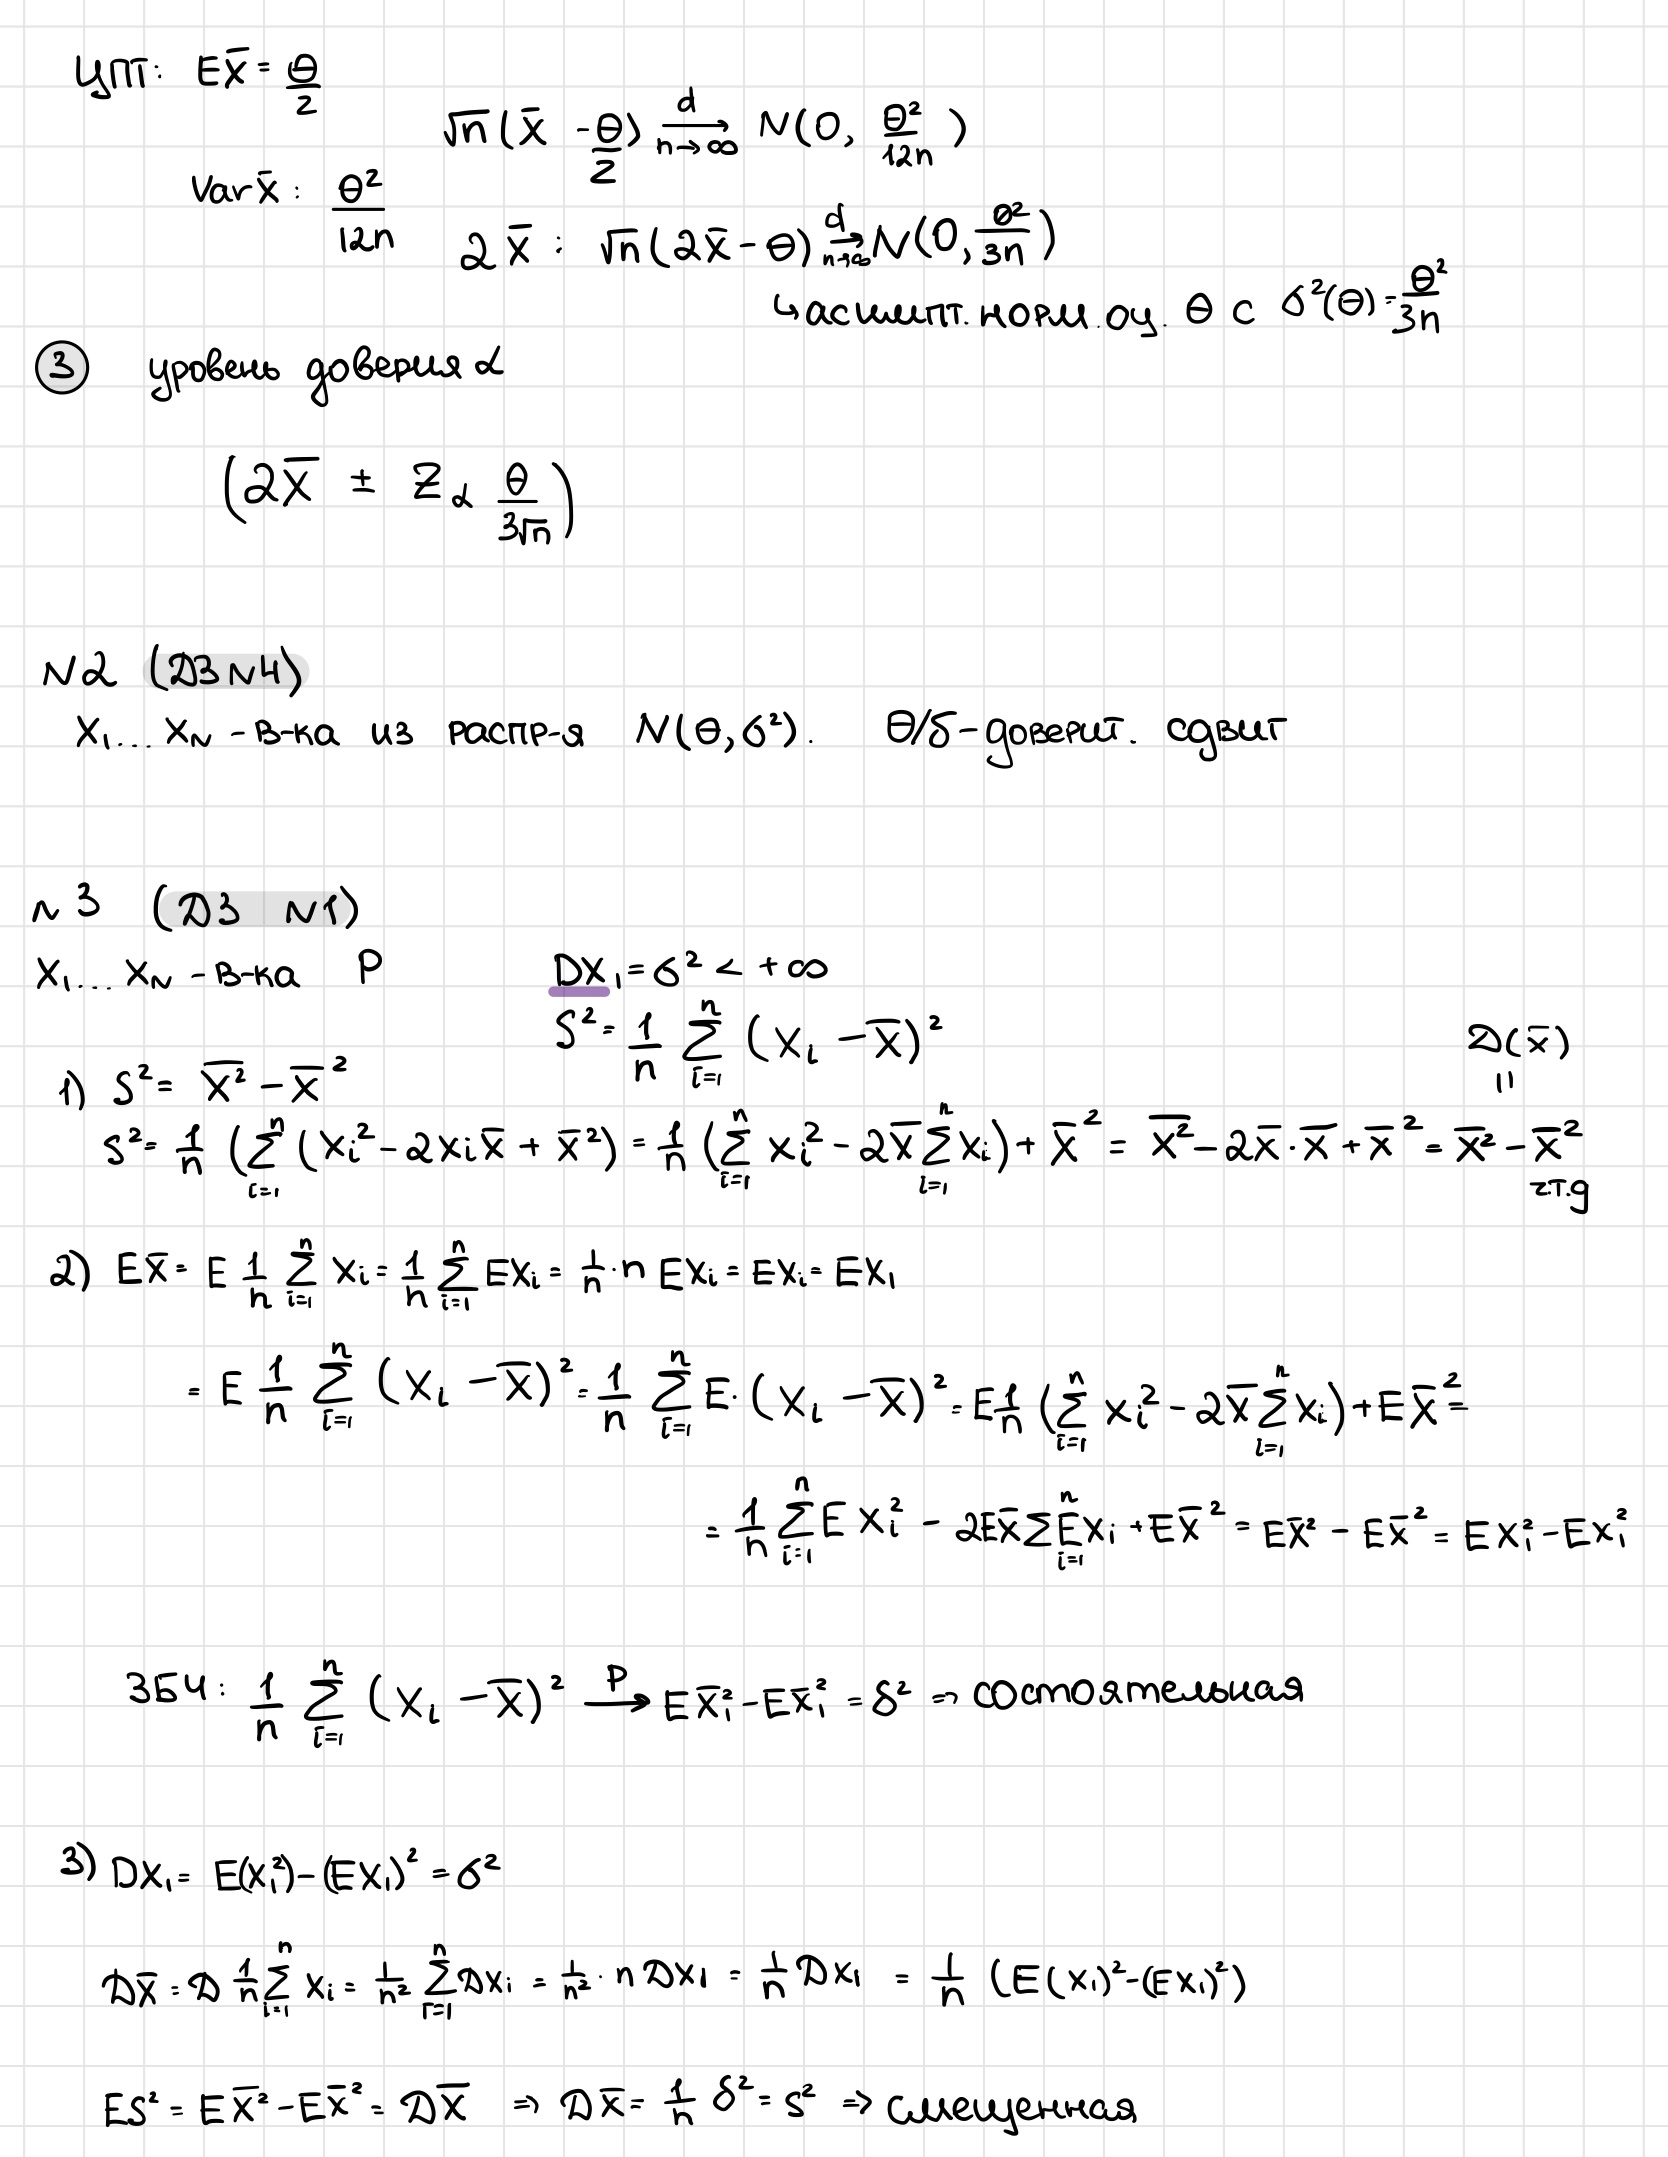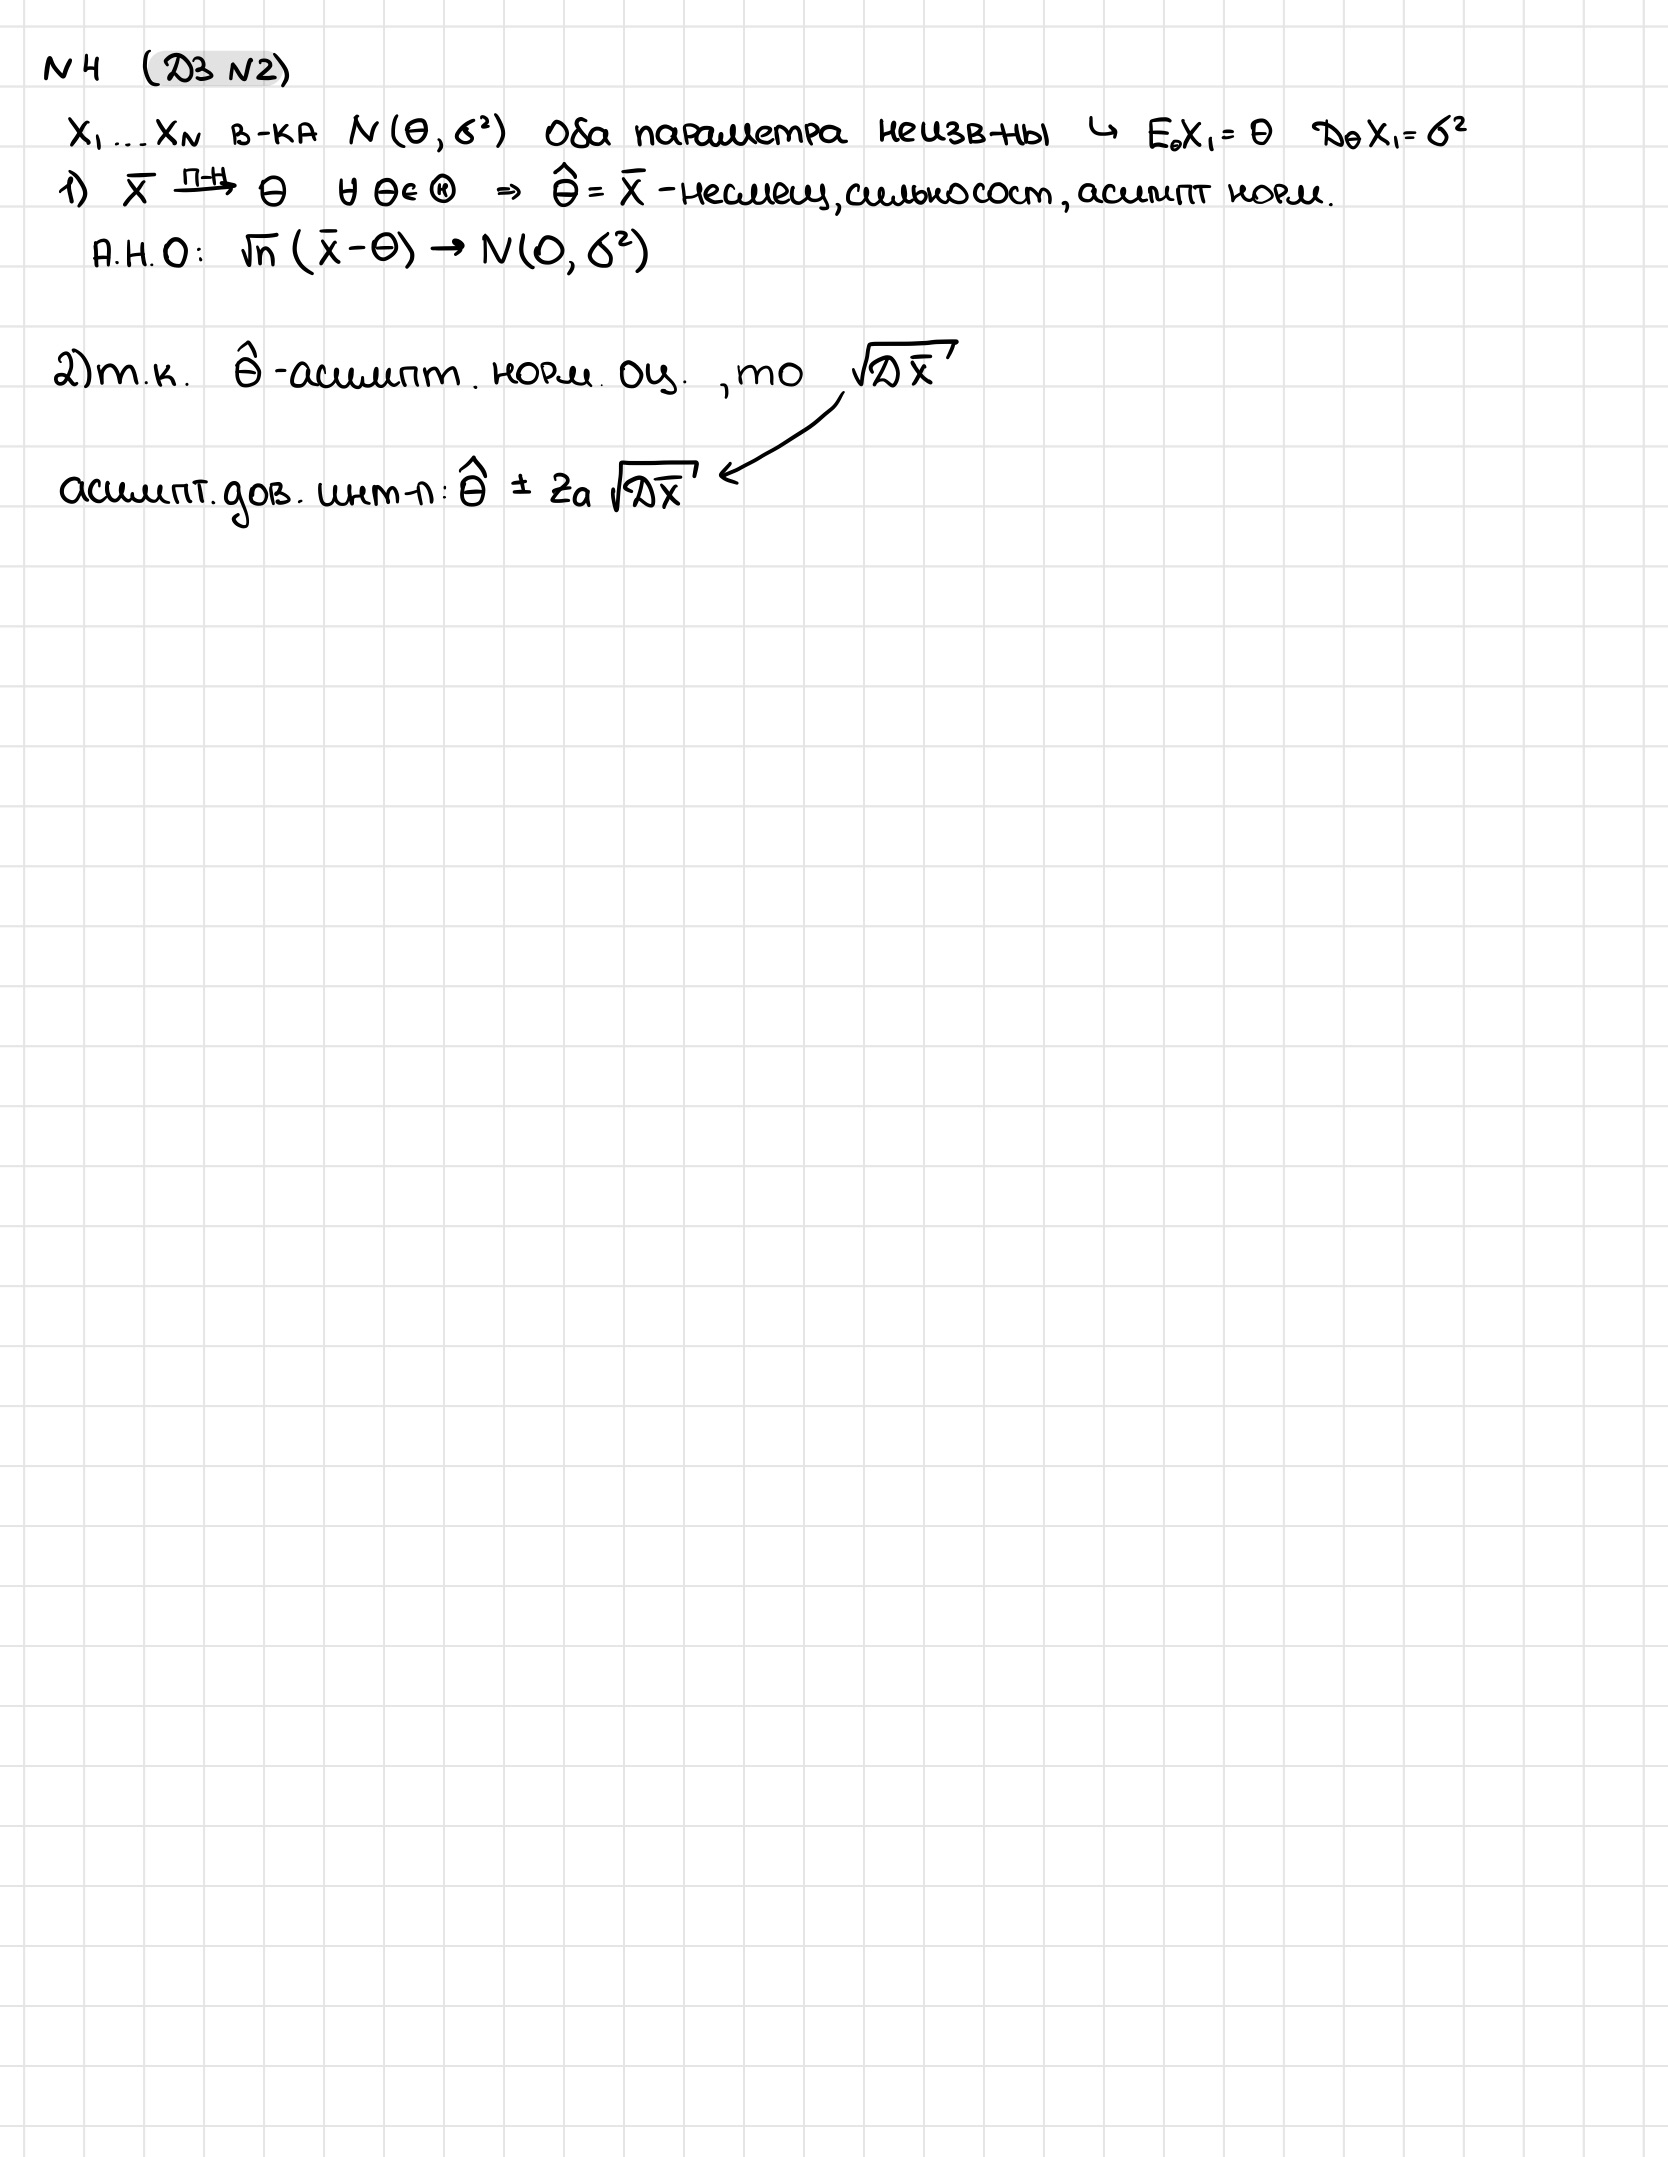